In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data_folder='/Users/adrianahernandezgonzalez/LabNotebook/vgic_mutants/nav15/dataDistances/'

# Load the CSV file into a DataFrame
#Vanilla
csv_file_vanilla = data_folder+'25-12-02_Nav15_wt_vanillaAF2_distances.csv'
df_vanilla = pd.read_csv(csv_file_vanilla)

#Masked
csv_file_masked = data_folder+'25-12-03_Nav15_wt_maskedAF2_distances.csv'
df_mask = pd.read_csv(csv_file_masked)

#EMS?

# Show the first few rows to confirm the data is loaded correctly
#print(df.head())

In [3]:
df_mask

,pdb_file,shortest_GLU209-LYS159,shortest_ARG220-GLU162,shortest_ARG220-PHE165,shortest_ARG220-GLU172,shortest_ARG220-ASP198,shortest_ARG220-GLU209,shortest_ARG223-GLU162,shortest_ARG223-PHE165,shortest_ARG223-GLU172,...,CA_PHE1157_CA-VAL1448_CA,CA_PHE1157_CA-ILE1452_CA,CA_PHE1157_CA-ILE1455_CA,CA_PHE1157_CA-PHE1459_CA,CA_ASP373_CA-GLU704_CA,CA_ASP373_CA-LYS1103_CA,CA_ASP373_CA-ALA1395_CA,CA_GLU704_CA-LYS1103_CA,CA_GLU704_CA-ALA1395_CA,CA_LYS1103_CA-ALA1395_CA
0,nav15_wt_masked_unrelaxed_rank_001_alphafold2_...,8.4,4.9,13.6,20.4,19.2,7.8,3.8,9.9,13.8,...,13.00,12.14,13.35,16.93,5.93,9.61,8.30,8.69,11.42,6.65
1,nav15_wt_masked_unrelaxed_rank_001_alphafold2_...,8.4,3.5,12.1,18.2,17.3,5.7,4.9,7.9,11.7,...,12.71,10.82,12.21,15.59,5.95,9.78,8.08,8.73,11.27,6.90
2,nav15_wt_masked_unrelaxed_rank_001_alphafold2_...,10.3,4.5,13.0,19.5,18.2,8.8,4.5,9.1,12.8,...,12.98,11.21,12.26,15.58,5.83,9.73,8.26,8.77,11.31,6.69
3,nav15_wt_masked_unrelaxed_rank_001_alphafold2_...,8.4,4.9,13.6,20.4,19.2,7.8,3.8,9.9,13.8,...,13.00,12.14,13.35,16.93,5.93,9.61,8.30,8.69,11.42,6.65
4,nav15_wt_masked_unrelaxed_rank_001_alphafold2_...,8.6,4.7,13.3,20.0,18.8,7.6,4.1,9.3,13.3,...,12.97,11.47,12.56,15.95,5.83,9.62,8.31,8.70,11.36,6.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,nav15_wt_masked_unrelaxed_rank_100_alphafold2_...,8.2,6.2,14.9,21.1,19.6,7.9,3.7,10.1,14.7,...,11.84,8.60,11.75,13.75,5.80,9.85,8.60,9.10,11.58,6.44
1196,nav15_wt_masked_unrelaxed_rank_100_alphafold2_...,8.0,6.5,15.2,21.3,19.9,8.1,3.7,10.2,14.8,...,11.92,8.73,11.80,13.66,5.81,9.78,8.53,9.04,11.55,6.46
1197,nav15_wt_masked_unrelaxed_rank_100_alphafold2_...,8.2,6.5,15.3,21.4,20.0,8.1,3.7,10.5,15.0,...,11.83,8.50,11.63,13.62,5.80,9.81,8.63,9.07,11.60,6.42
1198,nav15_wt_masked_unrelaxed_rank_100_alphafold2_...,8.1,6.3,15.2,21.2,19.9,7.5,3.7,10.4,14.9,...,11.84,8.75,11.71,13.62,5.83,9.80,8.57,9.04,11.58,6.47


In [4]:
def plot_distances_by_alias_violin(
    df,
    alias_dict,
    exp_distances_list=None,
    title_custom_add='',
    colors=None,
    fig_width=6,
    fig_height=6,
    dataset_labels=None,
    pdb_colors=None
):
    """
    Plots the distribution of distances by alias based on the specified columns.
    """

    aliases_in_order = list(alias_dict.keys())
    plot_records = []

    for alias in aliases_in_order:
        column_name = alias_dict[alias]
        if column_name not in df.columns:
            print(f"Warning: Column '{column_name}' not found in the DataFrame; alias '{alias}' will still appear empty.")
            plot_records.append({"Alias": alias, "Distance": None})
            continue

        distances = df[column_name].dropna()
        for d in distances.tolist():
            plot_records.append({"Alias": alias, "Distance": d})

        if len(distances) == 0:
            plot_records.append({"Alias": alias, "Distance": None})

    if not plot_records:
        print("No distances found to plot after checking provided columns.")
        return

    plot_df = pd.DataFrame(plot_records)
    plot_df["Alias"] = pd.Categorical(plot_df["Alias"], categories=aliases_in_order, ordered=True)

    sns.set(style="whitegrid", rc={"grid.linewidth": 0.6, "grid.color": "#e0e0e0"})

    n_aliases = len(aliases_in_order)
    if colors is not None and len(colors) == n_aliases:
        palette = colors
    else:
        palette = sns.color_palette("coolwarm", n_aliases)

    plt.figure(figsize=(fig_width, fig_height))
    sns.violinplot(
        x='Alias',
        y='Distance',
        data=plot_df,
        order=aliases_in_order,
        palette=palette,
        inner='box',
        cut=0,
        linewidth=0.8
    )

    if exp_distances_list and dataset_labels:
        if pdb_colors and len(pdb_colors) == len(exp_distances_list):
            colors_for_pdb = pdb_colors
        else:
            colors_for_pdb = ['black'] * len(exp_distances_list)

        marker_styles = ['o', 's', 'D', '^', 'v', 'P', '*', 'X','d','<','>']
        used_label = [False] * len(exp_distances_list)

        for i, exp_distances_dict in enumerate(exp_distances_list):
            for alias, exp_distances in exp_distances_dict.items():
                if alias not in aliases_in_order:
                    continue
                xpos = aliases_in_order.index(alias)
                for exp_distance in exp_distances:
                    plt.scatter(
                        [xpos], [exp_distance],
                        facecolors='white',
                        edgecolors=colors_for_pdb[i],
                        s=36,
                        zorder=5,
                        marker=marker_styles[i % len(marker_styles)],
                        label=(dataset_labels[i] if not used_label[i] else None)
                    )
                    used_label[i] = True

    plt.title(f'Distribution of Distances {title_custom_add}', fontsize=18, weight='light', pad=20)
    plt.xlabel('Pair of αC', fontsize=24, weight='light')
    plt.ylabel('Distance (Å)', fontsize=24, weight='light')
    plt.grid(True, linestyle='--', linewidth=0.5, color='#dcdcdc')
    plt.xticks(rotation=45, ha='right', fontsize=12, weight='light')
    sns.despine()
    plt.tight_layout()

    handles, labels = plt.gca().get_legend_handles_labels()
    if any(lbl for lbl in labels):
        plt.legend(
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0.0
        )

    plt.show()


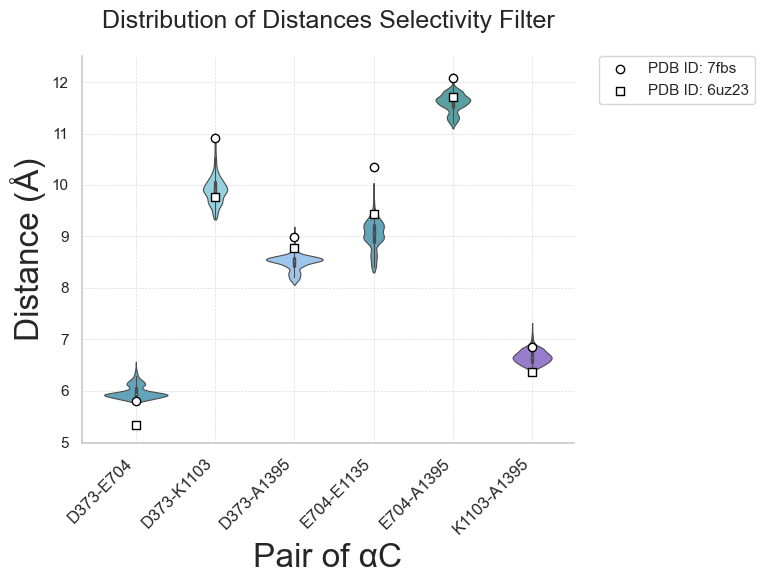

In [19]:
# Selectvity Filter Check
'''   ("ASP", 373, "GLU", 704 ), #Selectivity filter
    ("ASP", 373, "LYS", 1103 ),
    ("ASP", 373, "ALA", 1395 ),
    ("GLU", 704, "LYS", 1103 ),
    ("GLU", 704, "ALA", 1395 ),
    ("LYS", 1103, "ALA", 1395 )'''


alias_dict = {
    'D373-E704': 'CA_ASP373_CA-GLU704_CA',
    'D373-K1103': 'CA_ASP373_CA-LYS1103_CA',
    'D373-A1395': 'CA_ASP373_CA-ALA1395_CA',
    'E704-E1135': 'CA_GLU704_CA-LYS1103_CA',
    'E704-A1395': 'CA_GLU704_CA-ALA1395_CA',
    'K1103-A1395': 'CA_LYS1103_CA-ALA1395_CA'
}

# Optional list of custom colors for the violin plots
custom_colors = ['#53acc9', '#89d7eb', '#91c7f9', '#53acc9', '#4dabae', '#9370DB']

# Experimental distances to overlay (multiple datasets with lists for each alias)
exp_distances_list = [
    { #7fbs #D373,901,1421,1713
        'D373-E704': [5.804],
        'D373-K1103': [10.912],
        'D373-A1395': [8.988],
        'E704-E1135': [10.342],
        'E704-A1395': [12.075],
        'K1103-A1395': [6.84]
    },
    { #6uz3 #D373,E901,1421,1713
        'D373-E704': [5.332],
        'D373-K1103': [9.773],
        'D373-A1395': [8.78],
        'E704-E1135': [9.433],
        'E704-A1395': [11.71],
        'K1103-A1395': [6.371]
    }
]

# Labels for the datasets
dataset_labels = ['PDB ID: 7fbs', 'PDB ID: 6uz23'] 
# Custom colors for each PDB dataset
pdb_colors = ['#AC5336', '#D77614','#F99E09','#AC5336','#AB524D','#6BD0A3']

# Assuming df is already loaded with your CSV file
#plot_distances_by_alias_violin(df, alias_dict, xp_distances_list=exp_distances_list, title_custom_add='Selectivity Filter Subsampling 32-64', colors=custom_colors, fig_width=14, fig_height=8, dataset_labels=dataset_labels, pdb_colors=pdb_colors)
plot_distances_by_alias_violin(df_mask, alias_dict, exp_distances_list=exp_distances_list, title_custom_add='Selectivity Filter', colors=custom_colors, fig_width=6, fig_height=6, dataset_labels=dataset_labels, pdb_colors=None)
    

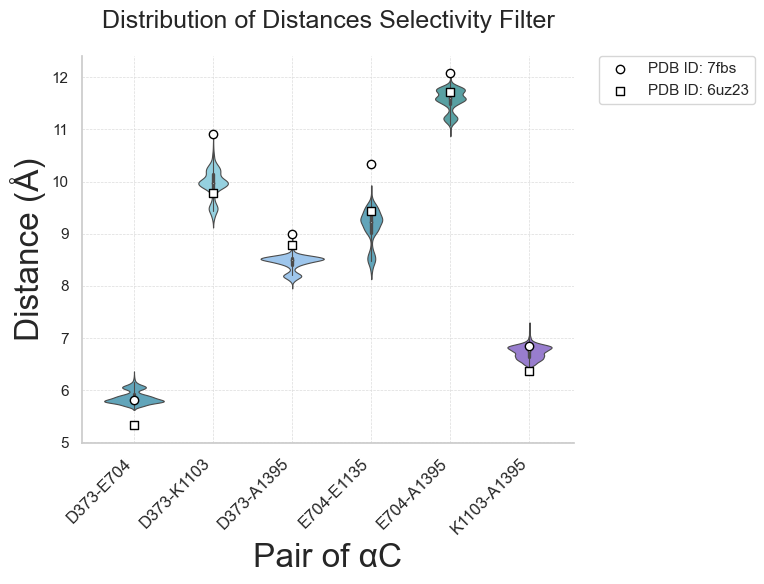

In [6]:
plot_distances_by_alias_violin(df_vanilla, alias_dict, exp_distances_list=exp_distances_list, title_custom_add='Selectivity Filter', colors=custom_colors, fig_width=6, fig_height=6, dataset_labels=dataset_labels, pdb_colors=None)


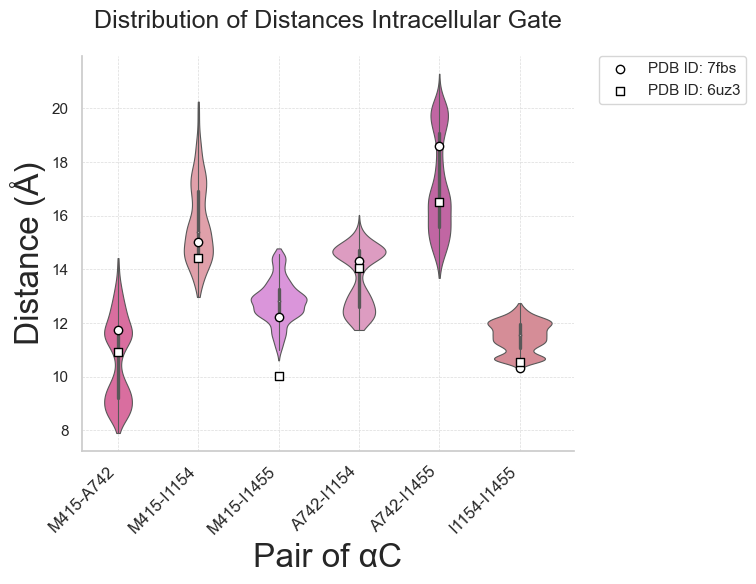

In [15]:

# Example usage
alias_dict = {
    'M415-A742':'CA_MET415_CA-ALA742_CA',
    'M415-I1154':'CA_MET415_CA-ILE1154_CA',
    'M415-I1455':'CA_MET415_CA-ILE1455_CA',
    'A742-I1154':'CA_ALA742_CA-ILE1154_CA',
    'A742-I1455':'CA_ALA742_CA-ILE1455_CA',
    'I1154-I1455':'CA_ILE1154_CA-ILE1455_CA'
}

# Optional list of custom colors for the violin plots
custom_colors = ['#eb5c9e', '#ea96a3', '#e689e6', '#e891c3', '#d057a8', '#e1818f']

# Experimental distances to overlay (example values, with lists for each alias)
exp_distances_list = [
    { #7FBS #M415,A939,I1472,I1773
    'M415-A742':[11.734],
    'M415-I1154':[15.009],
    'M415-I1455':[12.222],
    'A742-I1154':[14.315],
    'A742-I1455':[18.59],
    'I1154-I1455':[10.329]
}, { #6UZ3
    'M415-A742':[10.933],
    'M415-I1154':[14.410],
    'M415-I1455':[10.041],
    'A742-I1154':[14.044],
    'A742-I1455':[16.527],
    'I1154-I1455':[10.548]
}
]
# Labels for the datasets
dataset_labels = ['PDB ID: 7fbs', 'PDB ID: 6uz3']

# Custom colors for each PDB dataset
pdb_colors = ['#ff5733', '#33ff57', '#3375ff', '#ff33c4', '#ffd633', '#33fff5']

# Assuming df is already loaded with your CSV file
plot_distances_by_alias_violin(df_mask, alias_dict, exp_distances_list=exp_distances_list, title_custom_add='Intracellular Gate', colors=custom_colors, fig_width=6, fig_height=6, dataset_labels=dataset_labels, pdb_colors=None)


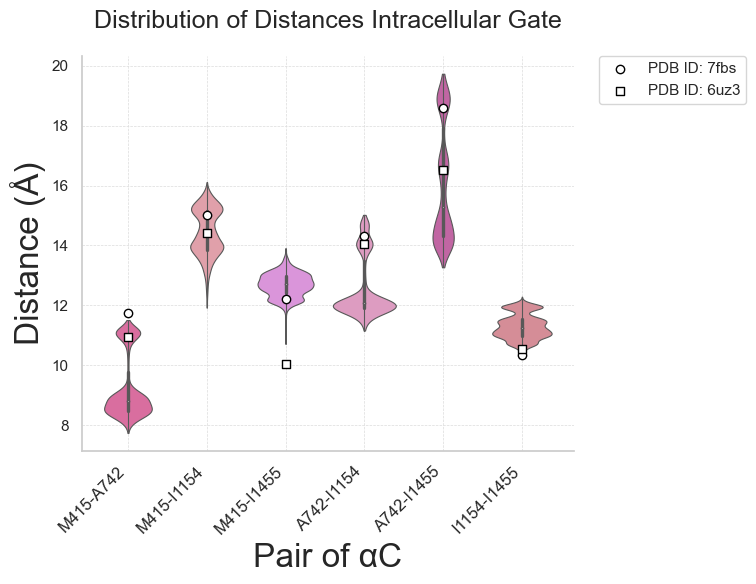

In [8]:
plot_distances_by_alias_violin(df_vanilla, alias_dict, exp_distances_list=exp_distances_list, title_custom_add='Intracellular Gate', colors=custom_colors, fig_width=6, fig_height=6, dataset_labels=dataset_labels, pdb_colors=None)


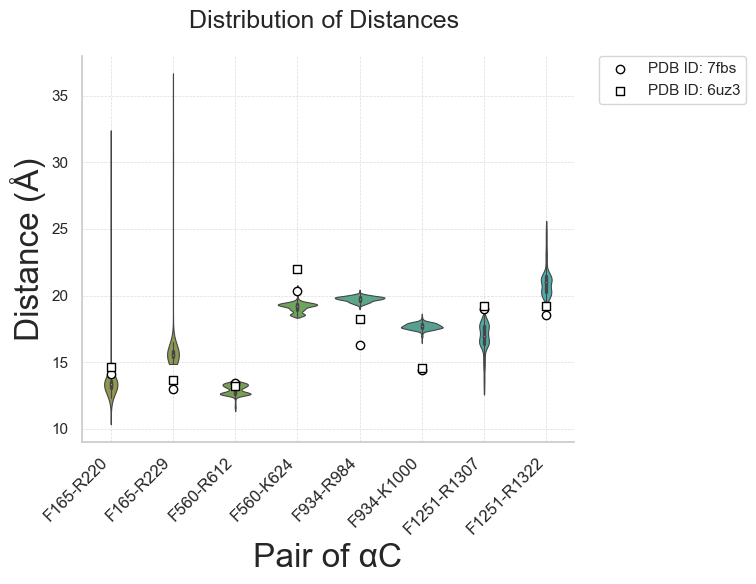

In [22]:
# Gating charges vs the aromatic middle in S2
alias_dict = {
    'F165-R220': 'CA_ARG220_CA-PHE165_CA',
    'F165-R229': 'CA_LYS229_CA-PHE165_CA',
    'F560-R612': 'CA_ARG612_CA-PHE560_CA',
    'F560-K624': 'CA_LYS624_CA-PHE560_CA',
    'F934-R984': 'CA_LYS984_CA-PHE934_CA',
    'F934-K1000': 'CA_ARG1000_CA-PHE934_CA',
    'F1251-R1307': 'CA_ARG1307_CA-PHE1251_CA',
    'F1251-R1322': 'CA_ARG1322_CA-PHE1251_CA',
}

# Optional list of custom colors for the violin plots
custom_colors = ['#9fa046','#92a348', '#7aaa48','#6aae52', '#4fb38c','#4aac99','#43b5b1','#3ebbbd']

# Experimental distances to overlay (multiple datasets with lists for each alias)
exp_distances_list = [
    { #7fbs
    'F165-R220': [14.115], #F165
    'F165-R229': [12.996], #
    'F560-R612': [13.47],
    'F560-K624': [20.356],
    'F934-R984': [16.317], #r1305 F1252
    'F934-K1000': [14.43], #1318
    'F1251-R1307': [19.02],
    'F1251-R1322': [18.533]
   },
    { #6uz3
    'F165-R220': [14.614], #
    'F165-R229': [13.695], #
    'F560-R612': [13.199], #R809 F757
    'F560-K624': [21.96], #K821
    'F934-R984': [18.27], 
    'F934-K1000': [14.585],
    'F1251-R1307': [19.207],#F1569 R1625
    'F1251-R1322': [19.19] #F1569 R1640
    }
]

# Labels for the datasets
dataset_labels = ['PDB ID: 7fbs', 'PDB ID: 6uz3']

# Custom colors for each PDB dataset
pdb_colors = ['#AC5336', '#D77614','#F99E09','#AC5336','#AB524D','#6BD0A3','#50C878','#88D499']

# Assuming df is already loaded with your CSV file
plot_distances_by_alias_violin(df_mask, alias_dict, exp_distances_list=exp_distances_list, title_custom_add='', colors=custom_colors, fig_width=6, fig_height=6, dataset_labels=dataset_labels, pdb_colors=None)


In [10]:
def plot_split_violin(df, alias_dict, title_custom_add='', fig_width=6, fig_height=6, colors=None):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    aliases = list(alias_dict.keys())
    rec = []

    for alias, (colA, colB) in alias_dict.items():
        if colA in df:
            for v in pd.to_numeric(df[colA], errors="coerce").dropna():
                rec.append({"Alias": alias, "Distance": v, "Dataset": "A"})
        else:
            print(f"Warning: missing column {colA}")

        if colB in df:
            for v in pd.to_numeric(df[colB], errors="coerce").dropna():
                rec.append({"Alias": alias, "Distance": v, "Dataset": "B"})
        else:
            print(f"Warning: missing column {colB}")

    plot_df = pd.DataFrame(rec)
    if plot_df.empty:
        print("No numeric distances found (all NaN after coercion or missing columns).")
        return

    sns.set(style="whitegrid", rc={"grid.linewidth": 0.6, "grid.color": "#e0e0e0"})
    plt.figure(figsize=(fig_width, fig_height))

    palette = colors if colors is not None else sns.color_palette("coolwarm", 2)

    sns.violinplot(
        data=plot_df,
        x="Alias",
        y="Distance",
        hue="Dataset",
        order=aliases,
        hue_order=["A", "B"],
        split=True,
        inner="box",
        cut=0,
        linewidth=0.8,
        palette=palette
    )

    plt.title(f"Distribution of Distances {title_custom_add}", fontsize=18, weight="light", pad=20)
    plt.xlabel("Pair of αC", fontsize=24, weight="light")
    plt.ylabel("Distance (Å)", fontsize=24, weight="light")
    plt.grid(True, linestyle="--", linewidth=0.5, color="#dcdcdc")
    plt.xticks(rotation=45, ha="right", fontsize=12, weight="light")
    sns.despine()
    plt.tight_layout()

    # optional: remove legend if you don't want it
    # plt.legend_.remove()

    plt.show()


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distances_by_alias_violin_overlay(
    df1,
    df2,
    alias_dict,
    df1_label="Dataset 1",
    df2_label="Dataset 2",
    exp_distances_list=None,     # optional: list of dicts like [{alias:[...], ...}, {...}]
    dataset_labels=None,         # optional: labels for exp_distances_list
    pdb_colors=None,             # optional: colors for exp points
    title_custom_add='',
    colors=None,                 # optional: [color_df1, color_df2]
    alpha=0.45,                  # transparency for violins
    fig_width=6,
    fig_height=6,
    linewidth=0.8,
):
    """
    Overlay violin plots from two dataframes at the same x positions with transparency.

    alias_dict maps display alias -> column name in each dataframe.
    Both df1 and df2 are expected to have those columns (some can be missing).
    """

    aliases_in_order = list(alias_dict.keys())

    def _to_long(df, dataset_name):
        records = []
        for alias in aliases_in_order:
            col = alias_dict[alias]
            if col not in df.columns:
                print(f"Warning: Column '{col}' not found in {dataset_name}; alias '{alias}' will appear empty.")
                records.append({"Alias": alias, "Distance": None, "Dataset": dataset_name})
                continue

            distances = df[col].dropna()
            if len(distances) == 0:
                records.append({"Alias": alias, "Distance": None, "Dataset": dataset_name})
            else:
                records.extend(
                    {"Alias": alias, "Distance": d, "Dataset": dataset_name}
                    for d in distances.tolist()
                )
        return records

    long_records = []
    long_records.extend(_to_long(df1, df1_label))
    long_records.extend(_to_long(df2, df2_label))

    if not long_records:
        print("No distances found to plot after checking provided columns.")
        return

    plot_df = pd.DataFrame(long_records)
    plot_df["Alias"] = pd.Categorical(plot_df["Alias"], categories=aliases_in_order, ordered=True)

    sns.set(style="whitegrid", rc={"grid.linewidth": 0.6, "grid.color": "#e0e0e0"})

    # Colors for the two overlaid datasets
    if colors is not None and len(colors) == 2:
        palette = {df1_label: colors[0], df2_label: colors[1]}
    else:
        # default two distinct colors
        pal2 = sns.color_palette("Set2", 2)
        palette = {df1_label: pal2[0], df2_label: pal2[1]}

    plt.figure(figsize=(fig_width, fig_height))

    ax = sns.violinplot(
        x="Alias",
        y="Distance",
        hue="Dataset",
        data=plot_df,
        order=aliases_in_order,
        palette=palette,
        dodge=False,        # crucial: overlap instead of side-by-side
        cut=0,
        inner="box",
        linewidth=linewidth,
    )

    # Set alpha on the filled violin bodies (PolyCollection objects)
    # (Leave box/lines opaque for readability)
    for coll in ax.collections:
        # Many collections are created; only PolyCollections are the violin bodies.
        # This heuristic works well in practice:
        try:
            coll.set_alpha(alpha)
        except Exception:
            pass

    # Optional: overlay experimental distances (kept similar to your original)
    if exp_distances_list and dataset_labels:
        if pdb_colors and len(pdb_colors) == len(exp_distances_list):
            colors_for_pdb = pdb_colors
        else:
            colors_for_pdb = ["black"] * len(exp_distances_list)

        marker_styles = ['o', 's', 'D', '^', 'v', 'P', '*', 'X', 'd', '<', '>']
        used_label = [False] * len(exp_distances_list)

        for i, exp_distances_dict in enumerate(exp_distances_list):
            for alias, exp_distances in exp_distances_dict.items():
                if alias not in aliases_in_order:
                    continue
                xpos = aliases_in_order.index(alias)
                for exp_distance in exp_distances:
                    ax.scatter(
                        [xpos], [exp_distance],
                        facecolors="white",
                        edgecolors=colors_for_pdb[i],
                        s=36,
                        zorder=6,
                        marker=marker_styles[i % len(marker_styles)],
                        label=(dataset_labels[i] if not used_label[i] else None)
                    )
                    used_label[i] = True

    ax.set_title(f"Distribution of Distances {title_custom_add}", fontsize=18, weight="light", pad=20)
    ax.set_xlabel("Pair of αC", fontsize=24, weight="light")
    ax.set_ylabel("Distance (Å)", fontsize=24, weight="light")
    ax.grid(True, linestyle="--", linewidth=0.5, color="#dcdcdc")
    plt.xticks(rotation=45, ha="right", fontsize=12, weight="light")
    sns.despine()
    plt.tight_layout()

    # Legend: keep one for datasets + optional exp points
    handles, labels = ax.get_legend_handles_labels()
    if any(lbl for lbl in labels):
        ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)

    plt.show()


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distances_by_alias_violin_overlay(
    df1,
    df2,
    alias_dict,
    df1_label="Dataset 1",
    df2_label="Dataset 2",
    exp_distances_list=None,     # optional: list of dicts like [{alias:[...], ...}, {...}]
    dataset_labels=None,         # optional: labels for exp_distances_list
    pdb_colors=None,             # optional: colors for exp points
    title_custom_add='',
    colors=None,                 # optional: [color_df1, color_df2]
    alpha=0.45,                  # transparency for violins
    fig_width=6,
    fig_height=6,
    linewidth=0.8,
):
    """
    Overlay violin plots from two dataframes at the same x positions with transparency.

    alias_dict maps display alias -> column name in each dataframe.
    Both df1 and df2 are expected to have those columns (some can be missing).
    """

    aliases_in_order = list(alias_dict.keys())

    def _to_long(df, dataset_name):
        records = []
        for alias in aliases_in_order:
            col = alias_dict[alias]
            if col not in df.columns:
                print(f"Warning: Column '{col}' not found in {dataset_name}; alias '{alias}' will appear empty.")
                records.append({"Alias": alias, "Distance": None, "Dataset": dataset_name})
                continue

            distances = df[col].dropna()
            if len(distances) == 0:
                records.append({"Alias": alias, "Distance": None, "Dataset": dataset_name})
            else:
                records.extend(
                    {"Alias": alias, "Distance": d, "Dataset": dataset_name}
                    for d in distances.tolist()
                )
        return records

    long_records = []
    long_records.extend(_to_long(df1, df1_label))
    long_records.extend(_to_long(df2, df2_label))

    if not long_records:
        print("No distances found to plot after checking provided columns.")
        return

    plot_df = pd.DataFrame(long_records)
    plot_df["Alias"] = pd.Categorical(plot_df["Alias"], categories=aliases_in_order, ordered=True)

    sns.set(style="whitegrid", rc={"grid.linewidth": 0.6, "grid.color": "#e0e0e0"})

    # Colors for the two overlaid datasets
    if colors is not None and len(colors) == 2:
        palette = {df1_label: colors[0], df2_label: colors[1]}
    else:
        # default two distinct colors
        pal2 = sns.color_palette("Set2", 2)
        palette = {df1_label: pal2[0], df2_label: pal2[1]}

    plt.figure(figsize=(fig_width, fig_height))

    ax = sns.violinplot(
        x="Alias",
        y="Distance",
        hue="Dataset",
        data=plot_df,
        order=aliases_in_order,
        palette=palette,
        dodge=False,        # crucial: overlap instead of side-by-side
        cut=0,
        inner="box",
        linewidth=linewidth,
    )

    # Set alpha on the filled violin bodies (PolyCollection objects)
    # (Leave box/lines opaque for readability)
    for coll in ax.collections:
        # Many collections are created; only PolyCollections are the violin bodies.
        # This heuristic works well in practice:
        try:
            coll.set_alpha(alpha)
        except Exception:
            pass

    # Optional: overlay experimental distances (kept similar to your original)
    if exp_distances_list and dataset_labels:
        if pdb_colors and len(pdb_colors) == len(exp_distances_list):
            colors_for_pdb = pdb_colors
        else:
            colors_for_pdb = ["black"] * len(exp_distances_list)

        marker_styles = ['o', 's', 'D', '^', 'v', 'P', '*', 'X', 'd', '<', '>']
        used_label = [False] * len(exp_distances_list)

        for i, exp_distances_dict in enumerate(exp_distances_list):
            for alias, exp_distances in exp_distances_dict.items():
                if alias not in aliases_in_order:
                    continue
                xpos = aliases_in_order.index(alias)
                for exp_distance in exp_distances:
                    ax.scatter(
                        [xpos], [exp_distance],
                        facecolors="white",
                        edgecolors=colors_for_pdb[i],
                        s=36,
                        zorder=6,
                        marker=marker_styles[i % len(marker_styles)],
                        label=(dataset_labels[i] if not used_label[i] else None)
                    )
                    used_label[i] = True

    ax.set_title(f"Distribution of Distances {title_custom_add}", fontsize=18, weight="light", pad=20)
    ax.set_xlabel("Pair of αC", fontsize=24, weight="light")
    ax.set_ylabel("Distance (Å)", fontsize=24, weight="light")
    ax.grid(True, linestyle="--", linewidth=0.5, color="#dcdcdc")
    plt.xticks(rotation=45, ha="right", fontsize=12, weight="light")
    sns.despine()
    plt.tight_layout()

    # Legend: keep one for datasets + optional exp points
    handles, labels = ax.get_legend_handles_labels()
    if any(lbl for lbl in labels):
        ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)

    plt.show()


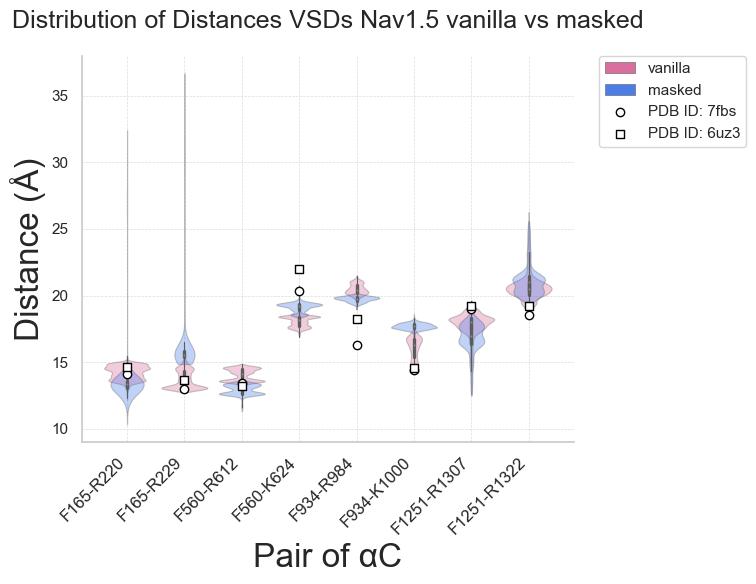

In [23]:
plot_distances_by_alias_violin_overlay(
    df1=df_vanilla,
    df2=df_mask,
    alias_dict=alias_dict,
    df1_label="vanilla",
    df2_label="masked",
    colors=["#eb5c9e", "#3375ff"],   # <- ONLY 2 colors, one per DF
    alpha=0.35,
    title_custom_add="VSDs Nav1.5 vanilla vs masked",
    fig_width=6,
    fig_height=6,
    exp_distances_list=exp_distances_list,
    dataset_labels=dataset_labels,
    pdb_colors=None,  # or give a list same length as exp_distances_list
)
